In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

In [4]:
df=pd.read_csv(r"C:\Users\arjun\Downloads\diabetes (1).csv")

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

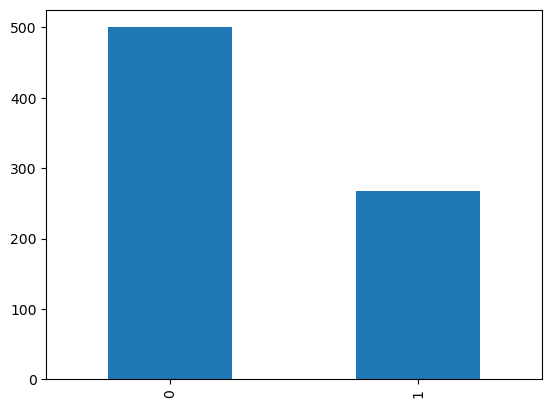

In [10]:
df['Outcome'].value_counts().plot(kind='bar')

In [11]:
X= df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:

y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [17]:
df['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [18]:

from sklearn.tree import DecisionTreeClassifier

In [19]:
model1 = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=10,max_samples=0.8,
                           oob_score=True,random_state=42)

In [20]:
model1.fit(X,y)

C:\Users\arjun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\arjun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  oob_score=True, random_state=42)

In [23]:
model1.oob_score_

0.7291666666666666

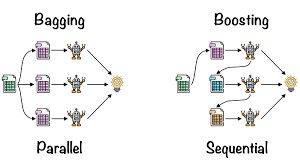

In [24]:
# OOB score means total Data go in to model but some data are not go in to model than model testing on waste  data and give
# score

In [26]:
model2 = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=10,max_samples=0.8,
                           oob_score=True,random_state=42)

In [28]:
model2.fit(Xtrain,ytrain)

C:\Users\arjun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\arjun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  oob_score=True, random_state=42)

In [29]:
model2.oob_score_

0.745928338762215

In [30]:
model.score(Xtest,ytest)

0.7402597402597403

In [31]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(DecisionTreeClassifier(),X,y,cv=10).mean()

0.7030758714969242

In [34]:
cross_val_score(DecisionTreeClassifier(),X,y,cv=5).mean()

0.7137170019522961

In [35]:
cross_val_score(DecisionTreeClassifier(),X,y,cv=5)

array([0.68181818, 0.68181818, 0.68831169, 0.77777778, 0.71895425])

In [36]:
cross_val_score(DecisionTreeClassifier(),X,y,cv=10)

array([0.64935065, 0.72727273, 0.71428571, 0.58441558, 0.67532468,
       0.7012987 , 0.83116883, 0.77922078, 0.59210526, 0.73684211])

In [39]:
cross_val_score(model2,X,y,cv=5)

array([0.73376623, 0.70779221, 0.75324675, 0.82352941, 0.75163399])

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
cross_val_score(model2,X,y,cv=5).mean()

0.753993718699601

In [41]:
model3 = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=10,max_samples=0.8,
                           oob_score=True,random_state=42)

In [42]:
def baging(podal):
    model3 = BaggingClassifier(estimator=podal,
                           n_estimators=10,max_samples=0.8,
                           oob_score=True,random_state=42)
    import warnings
    warnings.filterwarnings('ignore')
    cs = cross_val_score(podal,X,y,cv=5)
    
    return {'Five_score': cs,'Best_model': cs.mean()}
    
    
    

In [43]:
baging(DecisionTreeClassifier())

{'Five_score': array([0.70779221, 0.63636364, 0.68181818, 0.81699346, 0.73856209]),
 'Best_model': 0.7163059163059163}

In [44]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [45]:
baging(LogisticRegression())

{'Five_score': array([0.77272727, 0.74675325, 0.75974026, 0.81699346, 0.75163399]),
 'Best_model': 0.7695696460402341}

In [46]:
baging(KNeighborsClassifier())

{'Five_score': array([0.72727273, 0.72727273, 0.7012987 , 0.75816993, 0.70588235]),
 'Best_model': 0.723979288685171}

In [47]:
baging(SVC())

{'Five_score': array([0.74675325, 0.73376623, 0.77272727, 0.79084967, 0.75163399]),
 'Best_model': 0.7591460826754943}

In [52]:
all_model = [ SVC(),KNeighborsClassifier(), BernoulliNB(), 
             LinearRegression(),LogisticRegression(),DecisionTreeClassifier()]

for i in all_model:
    print(str(i)+"Result.............................")
    print(baging((i)),end="\n"*3)

SVC()Result.............................
{'Five_score': array([0.74675325, 0.73376623, 0.77272727, 0.79084967, 0.75163399]), 'Best_model': 0.7591460826754943}


KNeighborsClassifier()Result.............................
{'Five_score': array([0.72727273, 0.72727273, 0.7012987 , 0.75816993, 0.70588235]), 'Best_model': 0.723979288685171}


BernoulliNB()Result.............................
{'Five_score': array([0.64935065, 0.64935065, 0.63636364, 0.66013072, 0.64052288]), 'Best_model': 0.6471437059672354}


LinearRegression()Result.............................
{'Five_score': array([0.25683342, 0.2575739 , 0.29068798, 0.28108337, 0.29414534]), 'Best_model': 0.27606480052597404}


LogisticRegression()Result.............................
{'Five_score': array([0.77272727, 0.74675325, 0.75974026, 0.81699346, 0.75163399]), 'Best_model': 0.7695696460402341}


DecisionTreeClassifier()Result.............................
{'Five_score': array([0.67532468, 0.65584416, 0.68181818, 0.77777778, 0.7254902 ])